In [1]:
import matplotlib.pyplot as plt
import numpy as np

# JNB Lab Solutions

```{index} derivative optimization
```

```{index} entropy
```

**Exercise 1.1**

a)

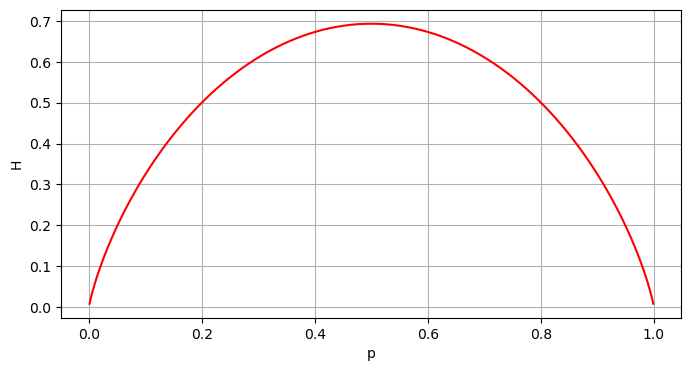

In [2]:
plt.figure(figsize=(8, 4))
plt.xlim=[0,1]
plt.ylim=[0,.1+np.log(.5)]
p=np.linspace(0.001,.999,1000)
H= -(p * np.log(p) + (1-p) *  np.log(1-p))
plt.plot(p,H,color='r')
plt.grid()
plt.xlabel("p")
plt.ylabel("H")
plt.show()

b)  Note that $H(p)=H(1-p)$, so $\lim_{p\rightarrow 0^+}H(p)=\lim_{p\rightarrow 1^-}H(p)$.

Using L'Hopitals Rule, 

$$
\lim_{-p\rightarrow 0^+}p\ln p = \lim_{p\rightarrow 0^+} \frac{-\ln p}{1/p} =  \lim_{p\rightarrow 0^+} \frac{-1/p}{-1/p^2}= \lim_{p\rightarrow 0^+} p = 0.
$$

Furthermore, $\lim_{p\rightarrow 0^+}-(1-p)\ln (1-p)=\lim_{q\rightarrow 1^-} -q \ln q = 0$. The desired result follows.

c)

Let $H(p)= -[p\ln p + (1-p)\ln(1-p)]$. Then

$$
H'(p) = - [( \ln p  +1 ) + (-\ln(1-p) -1)=-[\ln p - \ln(1-p)]= -[\ln \frac{p}{1-p}] = 0 \Rightarrow \frac{p}{1-p}=1\Rightarrow p=1-p\Rightarrow p=.5.
$$

Moreover, for values of $p$ near $p=.5$, if $p<.5$ then $H'(p)>0$ so $H$ is increasing, and if $p>.5$, then $H'(p)<0$ so $p$ is decreasing. This implies $H(.5)$ is a max.

Note that in this case $H''(.5)=0$ so the second derivative test does not apply.



```{index} series
```

**Exercise 2.1**

1.  a), b), and c) all have the same value of H= -(.5 ln .5 + .3ln .3 + .2 ln .2) $\approx$  1.03.

2.  Which option is labeled "1", "2" or "3" is inconsequential in the computation of the entropy of disagreement. (Note that this makes it difficult to apply entropy to a histogram where the bin numbers are purposefully ordered. For example, the label i might mean a student fails i tests in a particular math course.)

```{index} probability distributions
```

**Exercise 3.1**

a) $\int_0^{\infty} ke^{-kx}\,dx = -e^{-kx}\mid_0^{\infty}=0+1=1.$

b) The mean $E(X)$ is given by the integral $E(X)=\int_0^{\infty} (kx) e^{-kx}\,dx.$  Using integration by parts with $u=kx$, $du=k\,dx$, $dv=e^{-kx}\,dx$, $v=-(1/k)e^{-kx}$, we have


$E(X)= - xe^{-kx}\mid_{x=0}^{\infty} + \int_{x=0}^{\infty} -e^{-kx}\,dx= 0 -(1/k)e^{-kx}\mid_{x=0}^{\infty}=1/k.$

```{index} Monte Carlo simulation
```

**Exercise 4.1**

a) 


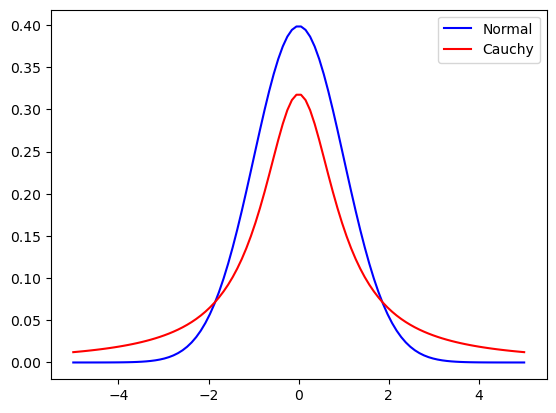

In [4]:
import math
import random
import scipy.stats as stats
from scipy.stats import powerlaw
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='b')
plt.plot(x, stats.cauchy.pdf(x, mu, sigma),color='red')
plt.legend(["Normal","Cauchy"])
plt.show()

b)

In [5]:
trials=10000
class_size=10
s = np.random.standard_cauchy(trials*class_size)

Hroutine=[]
Hexceptional=[]
Hsum=[]
k=0

for j in np.arange(0,trials,1):
    routine=0
    exceptional=0
    for i in np.arange(0,10,1):   
        if s[k]>3 or s[k]<-3:
            exceptional=exceptional+1
            k=k+1
        else: 
            routine=routine+1
            k=k+1
    if routine>0:
        p=routine/10
        Hroutine.append(-p*np.log(p))
    else:
        Hroutine.append(0)
    if exceptional>0:
        p=exceptional/10
        Hexceptional.append(-p*np.log(p))
    else:
        Hexceptional.append(0)
    Hsum.append(Hroutine[j]+Hexceptional[j])

        
H=np.mean(Hsum)
Hex=np.mean(Hexceptional)

print("Entropy of Cauchy Class=", H)  
print("Contribution to Entropy by Exceptional Students=", Hex)

Entropy of Cauchy Class= 0.4498874005479002
Contribution to Entropy by Exceptional Students= 0.27849303712298606


```{index} random number simulation
```

```{index} pseudo-random number generator (PRNG)
```

```{index} exponential distribution
```

```{index} uniform distribution
```

**Exercise 5.1**

In [17]:
import numpy as np
import pandas as pd
import random
num_cars=10

k=.1 #mean time between arrivals (in minutes)
df=pd.DataFrame()

#######PROCESS ORDERING DATA#######
df.loc[0,"order_arrival_time"]=0
df.loc[0,"time_to_order"]=15+30*random.uniform(0, 1)
df.loc[0,"pay_arrival_time"]=df.loc[0,"order_arrival_time"] + df.loc[0,"time_to_order"]
df.loc[0,"order_system_time"]=df.loc[0,"pay_arrival_time"]-df.loc[0,"order_arrival_time"]

for i in np.arange(1,num_cars,1):
    df.loc[i,"order_arrival_time"]=df.loc[i-1,"order_arrival_time"]-(60/k)*np.log(1-random.uniform(0, 1))
    df.loc[i,"time_to_order"]=15+30*random.uniform(0, 1)
    df.loc[i,"pay_arrival_time"]=max(df.loc[i,"order_arrival_time"] + df.loc[i,"time_to_order"], df.loc[i-1,"pay_arrival_time"]+df.loc[i,"time_to_order"])
    df.loc[i,"order_system_time"]=df.loc[i,"pay_arrival_time"]-df.loc[i,"order_arrival_time"]
   
####### PROCESS PAYING DATA #######  
if random.uniform(0,1)<.5:
    df.loc[0,"time_to_pay"]=30*random.uniform(0, 1) +5  #pay by cash
else:
    df.loc[0,"time_to_pay"]=15*random.uniform(0, 1)  +5  #pay by credit
df.loc[0,"pickup_arrival_time"]=df.loc[0,"pay_arrival_time"] + df.loc[0,"time_to_pay"] 
df.loc[0,"pay_system_time"]=df.loc[0,"pickup_arrival_time"]-df.loc[0,"pay_arrival_time"]
        
for i in np.arange(1,num_cars,1):
    if random.uniform(0,1)<.5:
        df.loc[i,"time_to_pay"]=30*random.uniform(0, 1)  +5  #pay by cash
    else:
        df.loc[i,"time_to_pay"]=15**random.uniform(0, 1)  +5  #pay by credit
    df.loc[i,"pickup_arrival_time"]=max(df.loc[i,"pay_arrival_time"] + df.loc[i,"time_to_pay"], df.loc[i-1,"pickup_arrival_time"]+df.loc[i,"time_to_pay"] )
    df.loc[i,"pay_system_time"]=df.loc[i,"pickup_arrival_time"]-df.loc[i,"pay_arrival_time"]
    
###### PROCESS PICKUP DATA #######
df.loc[0,"time_to_pickup"]= 60*random.uniform(0,1)+ 30
df.loc[0,"finish_time"]=df.loc[0,"pickup_arrival_time"] + df.loc[0,"time_to_pickup"] 
df.loc[0,"pickup_system_time"]=df.loc[0,"finish_time"]-df.loc[0,"pickup_arrival_time"]
        
for i in np.arange(1,num_cars,1):
    df.loc[i,"time_to_pickup"]= 60*random.uniform(0,1)+ 30
    df.loc[i,"finish_time"]=max(df.loc[i,"pickup_arrival_time"] + df.loc[i,"time_to_pickup"], df.loc[i-1,"finish_time"]+df.loc[i,"time_to_pickup"] )
    df.loc[i,"pickup_system_time"]=df.loc[i,"finish_time"]-df.loc[i,"pickup_arrival_time"]

In [18]:
table = df[["order_arrival_time","time_to_order","order_system_time","pay_arrival_time","time_to_pay","pay_system_time","pickup_arrival_time","time_to_pickup","pickup_system_time", "finish_time"]]
table

,order_arrival_time,time_to_order,order_system_time,pay_arrival_time,time_to_pay,pay_system_time,pickup_arrival_time,time_to_pickup,pickup_system_time,finish_time
0,0.000000,43.602984,43.602984,43.602984,7.556623,7.556623,51.159607,65.477791,65.477791,116.637398
1,481.388415,33.366122,33.366122,514.754537,6.231221,6.231221,520.985758,56.592074,56.592074,577.577832
2,1219.912249,41.477045,41.477045,1261.389293,23.202241,23.202241,1284.591534,58.655755,58.655755,1343.247289
3,1294.706715,30.565060,30.565060,1325.271775,12.672773,12.672773,1337.944548,43.237563,48.540305,1386.484852
4,1683.852787,43.093286,43.093286,1726.946073,6.338934,6.338934,1733.285006,82.937953,82.937953,1816.222959
5,2240.226570,43.522066,43.522066,2283.748635,16.409112,16.409112,2300.157747,51.509599,51.509599,2351.667346
6,2859.137294,39.779653,39.779653,2898.916947,6.035139,6.035139,2904.952086,57.808210,57.808210,2962.760296
7,4292.462366,27.259678,27.259678,4319.722044,23.996465,23.996465,4343.718509,76.043934,76.043934,4419.762443
8,4423.265534,35.461872,35.461872,4458.727406,34.086612,34.086612,4492.814018,76.186779,76.186779,4569.000797
9,5183.852133,22.406112,22.406112,5206.258245,8.030864,8.030864,5214.289109,37.802962,37.802962,5252.092071


In [19]:
def graph(num_cars,k):
    k=k #mean time between arrivals (in minutes)
    df=pd.DataFrame()

    #######PROCESS ORDERING DATA#######
    df.loc[0,"order_arrival_time"]=0
    df.loc[0,"time_to_order"]=15+30*random.uniform(0, 1)
    df.loc[0,"pay_arrival_time"]=df.loc[0,"order_arrival_time"] + df.loc[0,"time_to_order"]
    df.loc[0,"order_system_time"]=df.loc[0,"pay_arrival_time"]-df.loc[0,"order_arrival_time"]
    for i in np.arange(1,num_cars,1):
        df.loc[i,"order_arrival_time"]=df.loc[i-1,"order_arrival_time"]-(60/k)*np.log(1-random.uniform(0, 1))
        df.loc[i,"time_to_order"]=15+30*random.uniform(0, 1)
        df.loc[i,"pay_arrival_time"]=max(df.loc[i,"order_arrival_time"] + df.loc[i,"time_to_order"], df.loc[i-1,"pay_arrival_time"]+df.loc[i,"time_to_order"])
        df.loc[i,"order_system_time"]=df.loc[i,"pay_arrival_time"]-df.loc[i,"order_arrival_time"]

    ####### PROCESS PAYING DATA #######  
    if random.uniform(0,1)<.5:
        df.loc[0,"time_to_pay"]=30*random.uniform(0, 1) +5  #pay by cash
    else:
        df.loc[0,"time_to_pay"]=15*random.uniform(0, 1)  +5  #pay by credit
    df.loc[0,"pickup_arrival_time"]=df.loc[0,"pay_arrival_time"] + df.loc[0,"time_to_pay"] 
    df.loc[0,"pay_system_time"]=df.loc[0,"pickup_arrival_time"]-df.loc[0,"pay_arrival_time"]

    for i in np.arange(1,num_cars,1):
        if random.uniform(0,1)<.5:
            df.loc[i,"time_to_pay"]=30*random.uniform(0, 1)  +5  #pay by cash
        else:
            df.loc[i,"time_to_pay"]=15**random.uniform(0, 1)  +5  #pay by credit
        df.loc[i,"pickup_arrival_time"]=max(df.loc[i,"pay_arrival_time"] + df.loc[i,"time_to_pay"], df.loc[i-1,"pickup_arrival_time"]+df.loc[i,"time_to_pay"] )
        df.loc[i,"pay_system_time"]=df.loc[i,"pickup_arrival_time"]-df.loc[i,"pay_arrival_time"]

    ###### PROCESS PICKUP DATA #######
    df.loc[0,"time_to_pickup"]= 60*random.uniform(0,1)+ 30
    df.loc[0,"finish_time"]=df.loc[0,"pickup_arrival_time"] + df.loc[0,"time_to_pickup"] 
    df.loc[0,"pickup_system_time"]=df.loc[0,"finish_time"]-df.loc[0,"pickup_arrival_time"]
        
    for i in np.arange(1,num_cars,1):
        df.loc[i,"time_to_pickup"]= 60*random.uniform(0,1)+ 30
        df.loc[i,"finish_time"]=max(df.loc[i,"pickup_arrival_time"] + df.loc[i,"time_to_pickup"], df.loc[i-1,"finish_time"]+df.loc[i,"time_to_pickup"] )
        df.loc[i,"pickup_system_time"]=df.loc[i,"finish_time"]-df.loc[i,"pickup_arrival_time"]


    
    system_mean=(np.mean(df["order_system_time"])+np.mean(df["pay_system_time"])+np.mean(df["pickup_system_time"]))/3
        
    return system_mean

In [20]:
results=pd.DataFrame()
for n in np.arange(0,20,1):
    k=.1+.1*n
    results.loc[n,"k"]=k
    results.loc[n,"ave_system_time"]=graph(num_cars,k)

Text(0, 0.5, 'mean time in system (seconds)')

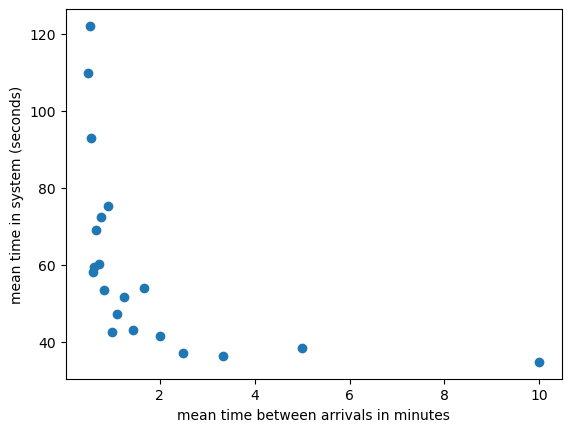

In [21]:
# Graph of k vs ave_system_time
import matplotlib.pyplot as plt

plt.scatter(1/results["k"],results["ave_system_time"])
plt.xlabel("mean time between arrivals in minutes")
plt.ylabel("mean time in system (seconds)")

Note:  This type of analysis can be done using an Excel spreadsheet.  For example, see https://docs.google.com/spreadsheets/d/1JPq2UfIWMTHizAq6_gH9WYm_qXZodi7v/edit?usp=sharing&ouid=101192945680365451790&rtpof=true&sd=true